<a href="https://colab.research.google.com/github/kanjamwingirwa/Quantium_DataAnalytics_Internship/blob/kanja/Quantium_DataAnalytics_Internship_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import warnings
import plotly.express as px
warnings. filterwarnings("ignore")

In [3]:
#Let us begin by loading the datasets
purchase_behaviour_df = pd.read_csv('/content/QVI_purchase_behaviour.csv')
purchase_behaviour_df.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
purchase_behaviour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
#Let us begin by loading the datasets
transaktions_df = pd.read_excel('/content/QVI_transaction_data.xlsx')
transaktions_df.tail(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [6]:
transaktions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


# **Data Cleaning**

In [7]:
#let's check for null values
transaktions_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
purchase_behaviour_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

There are no null values to speak of

In [9]:
#let's parse the dates

# Rename date column and separate into year, month, day etc
transaktions_df['Date'] = pd.to_datetime(transaktions_df['DATE'],errors='coerce',unit='d',origin='1900-01-01')
transaktions_df['Year'] = transaktions_df['Date'].dt.year
transaktions_df['Month'] = transaktions_df['Date'].dt.month
transaktions_df['DayOfWeek']  = transaktions_df['Date'].dt.day_name()

In [10]:
#lets check to see if the changes have been implemented
transaktions_df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday


In [11]:
#lets change some columns into objects as they dont represent actual integers
transaktions_df['STORE_NBR'] = transaktions_df['STORE_NBR'].astype('object')
transaktions_df['LYLTY_CARD_NBR'] = transaktions_df['LYLTY_CARD_NBR'].astype('object')
transaktions_df['PROD_NBR'] = transaktions_df['PROD_NBR'].astype('object')
transaktions_df['TXN_ID'] = transaktions_df['TXN_ID'].astype('object')

In [12]:
#let's check to see if the changes have been implemented
transaktions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  int64         
 1   STORE_NBR       264836 non-null  object        
 2   LYLTY_CARD_NBR  264836 non-null  object        
 3   TXN_ID          264836 non-null  object        
 4   PROD_NBR        264836 non-null  object        
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   Date            264836 non-null  datetime64[ns]
 9   Year            264836 non-null  int64         
 10  Month           264836 non-null  int64         
 11  DayOfWeek       264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 24.2+ MB


In [13]:
#lets delete the date column as it no longer matters

transaktions_df = transaktions_df.drop(['DATE'], axis=1)
transaktions_df.head(5)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-22,2019,5,Wednesday
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-19,2018,8,Sunday
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-20,2018,8,Monday


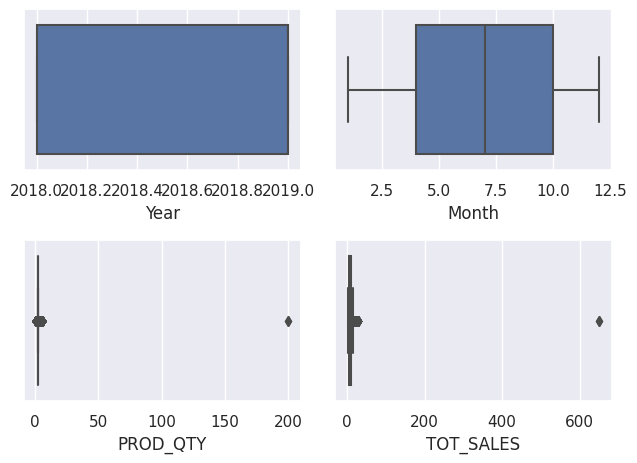

In [14]:
#let's look for outliers

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 3 columns)
fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sns.boxplot(x=transaktions_df['Year'], ax=axes[0,0])


sns.boxplot(x=transaktions_df ['Month'], ax=axes[0,1])
sns.boxplot(x=transaktions_df['PROD_QTY'], ax=axes[1,0])
sns.boxplot(x=transaktions_df['TOT_SALES'], ax=axes[1,1])

plt.tight_layout()